# AI Coursework 1

<font color='red'>Impelent heurisitc search, check time, check cost and expanded nodes in all algorithms, have another dfs with reverse option, change the code , add data structure for stack , queue and ..</font>

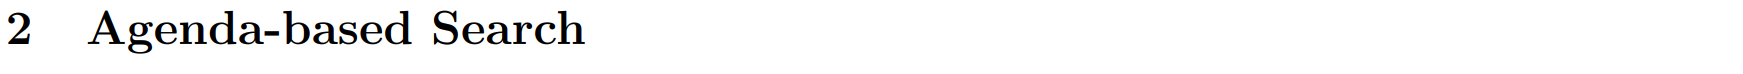

[StartingStation], [EndingStation], [TubeLine], [AverageTimeTaken], [MainZone],
[SecondaryZone]

In [2]:
import pandas as pd
df = pd.read_csv('tubedata.csv', header=None)
df.head(50)

,0,1,2,3,4,5
0,Harrow & Wealdstone,Kenton,Bakerloo,3,5,0
1,Kenton,South Kenton,Bakerloo,2,4,0
2,South Kenton,North Wembley,Bakerloo,2,4,0
3,North Wembley,Wembley Central,Bakerloo,2,4,0
4,Wembley Central,Stonebridge Park,Bakerloo,3,4,0
5,Stonebridge Park,Harlesden,Bakerloo,2,3,0
6,Harlesden,Willesden Junction,Bakerloo,2,3,0
7,Willesden Junction,Kensal Green,Bakerloo,3,3,0
8,Kensal Green,Queen's Park,Bakerloo,3,2,0
9,Queen's Park,Kilburn Park,Bakerloo,2,2,0


In [3]:
from collections import defaultdict
 
station_dict = defaultdict(list)
zone_dict = defaultdict(set)

In [4]:
station_dict

defaultdict(list, {})

In [5]:
zone_dict

defaultdict(set, {})

In [6]:
# get data row by row
for index, row in df.iterrows():
  
  start_station = row[0]
  end_station = row[1]
  line = row[2]
  act_cost = int(row[3])
  zone1 = row[4]
  zone2 = row[5]
    
  # station dictionary of child station tuples (child_name, cost from parent to the child)
  # {"Mile End": [("Stepney Green", 2), ("Wembley", 1)]}
  station_list = station_dict[start_station]
  station_list.append((end_station, act_cost, line))

  # the following two lines add the other direction of the tube "step"
  station_list = station_dict[end_station]
  station_list.append((start_station, act_cost, line))
  
  # we add the main zone
  zone_dict[start_station].add(zone1)
  # we add the secondary zone
  if zone2 != "0":
#     print(row[2], start_station, end_station)
    zone_dict[start_station].add(zone2)
    # if the secondary zone is not 0 it's the main zone for the ending station
    zone_dict[end_station].add(zone2)
  else:
    # otherwise the main zone for the ending station is the same as for the starting station
    zone_dict[end_station].add(zone1)

In [7]:
station_dict

defaultdict(list,
            {'Harrow & Wealdstone': [('Kenton', 3, 'Bakerloo')],
             'Kenton': [('Harrow & Wealdstone', 3, 'Bakerloo'),
              ('South Kenton', 2, 'Bakerloo')],
             'South Kenton': [('Kenton', 2, 'Bakerloo'),
              ('North Wembley', 2, 'Bakerloo')],
             'North Wembley': [('South Kenton', 2, 'Bakerloo'),
              ('Wembley Central', 2, 'Bakerloo')],
             'Wembley Central': [('North Wembley', 2, 'Bakerloo'),
              ('Stonebridge Park', 3, 'Bakerloo')],
             'Stonebridge Park': [('Wembley Central', 3, 'Bakerloo'),
              ('Harlesden', 2, 'Bakerloo')],
             'Harlesden': [('Stonebridge Park', 2, 'Bakerloo'),
              ('Willesden Junction', 2, 'Bakerloo')],
             'Willesden Junction': [('Harlesden', 2, 'Bakerloo'),
              ('Kensal Green', 3, 'Bakerloo')],
             'Kensal Green': [('Willesden Junction', 3, 'Bakerloo'),
              ("Queen's Park", 3, 'Bakerloo')],
 

In [8]:
zone_dict

defaultdict(set,
            {'Harrow & Wealdstone': {'5'},
             'Kenton': {'4', '5'},
             'South Kenton': {'4'},
             'North Wembley': {'4'},
             'Wembley Central': {'4'},
             'Stonebridge Park': {'3', '4'},
             'Harlesden': {'3'},
             'Willesden Junction': {'3'},
             'Kensal Green': {'2', '3'},
             "Queen's Park": {'2'},
             'Kilburn Park': {'2'},
             'Maida Vale': {'2'},
             'Warwick Avenue': {'2'},
             'Paddington': {'1', '2'},
             'Edgware Road': {'1'},
             'Marylebone': {'1'},
             'Baker Street': {'1', '2'},
             "Regent's Park": {'1'},
             'Oxford Circus': {'1'},
             'Piccadilly Circus': {'1'},
             'Charing Cross': {'1'},
             'Embankment': {'1'},
             'Waterloo': {'1'},
             'Lambeth North': {'1'},
             'Elephant & Castle': {'1', '2'},
             'West Ruislip': {'6'},
 

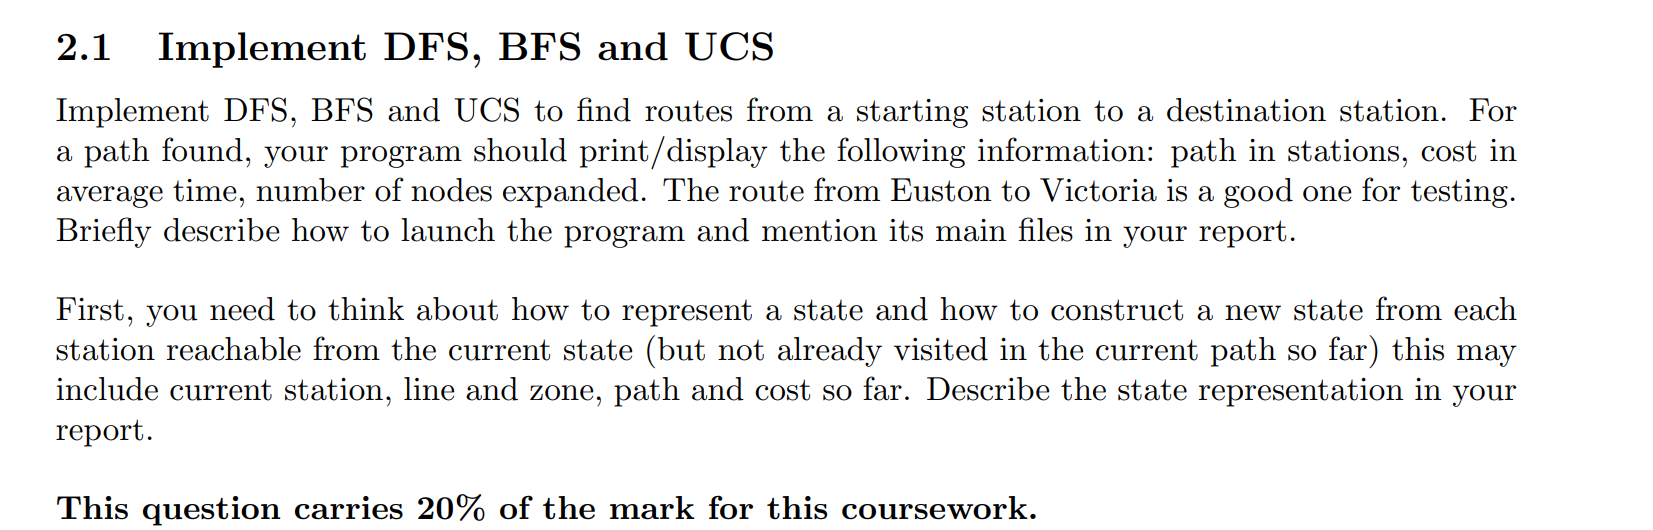

In [9]:
class State:
    
    def __init__(self, current_station, line, path, cost):
        
        self.current_station = current_station
        self.path = path
        self.cost = cost
        self.line  = line
        self.zone = zone_dict[current_station]
        
    def get_neighbours(self):
#         print("hello")
        neighbours_list = []
        
        for neighbour, neighbour_cost, line in station_dict[self.current_station]:


            new_path = self.path + [neighbour]
            new_cost = self.cost + neighbour_cost
            neighbours_list.append(State(neighbour, line, new_path, new_cost))
                
        return neighbours_list
    
    def __lt__(self, other):
       
        return self.cost < other.cost

In [10]:
import time

In [11]:
def dfs(start_station, goal_station):
    start_time = time.time()
    start_state = State(start_station, None, [start_station], 0)
    stack = [start_state]
    visited = set()
    expanded_nodes = 0

    while stack:
        current_state = stack.pop()

        if current_state.current_station == goal_station:
            end_time = time.time()
            return current_state.path, current_state.cost, expanded_nodes, ((end_time - start_time)/len(current_state.path))

        expanded_nodes += 1

        for neighbour in current_state.get_neighbours():
            if neighbour.current_station not in visited:
                visited.add(neighbour.current_station)
                stack.append(neighbour)

In [12]:
def bfs(start_station, goal_station):
    start_time = time.time()
    start_state = State(start_station, None, [start_station], 0)
    queue = [start_state]
    visited = set()
    expanded_nodes = 0

    while queue:
        current_state = queue.pop(0)
        

        if current_state.current_station == goal_station:
            end_time = time.time()
#             print((end_time - start_time))
            return current_state.path, current_state.cost , expanded_nodes, ((end_time - start_time)/len(current_state.path))
        
        expanded_nodes += 1
        
        for neighbour in current_state.get_neighbours():
            
            if neighbour.current_station not in visited:
                
                visited.add(neighbour.current_station)
                queue.extend([neighbour])

In [13]:
def ucs(start_station, goal_station):
    start_time = time.time()
    start_state = State(start_station, None, [start_station], 0)
    priority_queue = [(0, start_state)]
    visited = set()
    expanded_nodes = 0

    while priority_queue:
        priority, current_state = priority_queue.pop(0)
       

        if current_state.current_station == goal_station:
            end_time = time.time()
            return current_state.path, current_state.cost , expanded_nodes, ((end_time - start_time)/len(current_state.path))
        
        expanded_nodes += 1
            
        for neighbour in current_state.get_neighbours():
            
            if neighbour.current_station not in visited:
                
                visited.add(neighbour.current_station)
                priority_queue.extend([(current_state.cost + neighbour.cost, neighbour)])
                priority_queue.sort(key=lambda x: x[0])  # Sort the priority queue based on cost

In [14]:
start_station = 'Euston'
goal_station = 'Victoria'

dfs_result = dfs(start_station, goal_station)
bfs_result = bfs(start_station, goal_station)
ucs_result = ucs(start_station, goal_station)


print("DFS Result:", dfs_result)
print("BFS Result:", bfs_result)
print("UCS Result:", ucs_result)  

DFS Result: (['Euston', "King's Cross St. Pancras", 'Russell Square', 'Holborn', 'Covent Garden', 'Leicester Square', 'Piccadilly Circus', 'Green Park', 'Victoria'], 13, 24, 0.0)
BFS Result: (['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'], 7, 35, 0.0)
UCS Result: (['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'], 7, 30, 0.00019927024841308593)


In [15]:
            
start_station = 'Waterloo'
goal_station = 'Chancery Lane'

dfs_result = dfs(start_station, goal_station)
bfs_result = bfs(start_station, goal_station)
ucs_result = ucs(start_station, goal_station)


print("DFS Result:", dfs_result)
print("BFS Result:", bfs_result)
print("UCS Result:", ucs_result)            

DFS Result: (['Waterloo', 'Bank/Monument', 'Moorgate', 'Old Street', 'Angel', "King's Cross St. Pancras", 'Russell Square', 'Holborn', 'Chancery Lane'], 18, 230, 0.0001105997297498915)
BFS Result: (['Waterloo', 'Bank/Monument', "St. Paul's", 'Chancery Lane'], 8, 30, 0.0)
UCS Result: (['Waterloo', 'Bank/Monument', "St. Paul's", 'Chancery Lane'], 8, 35, 0.0)


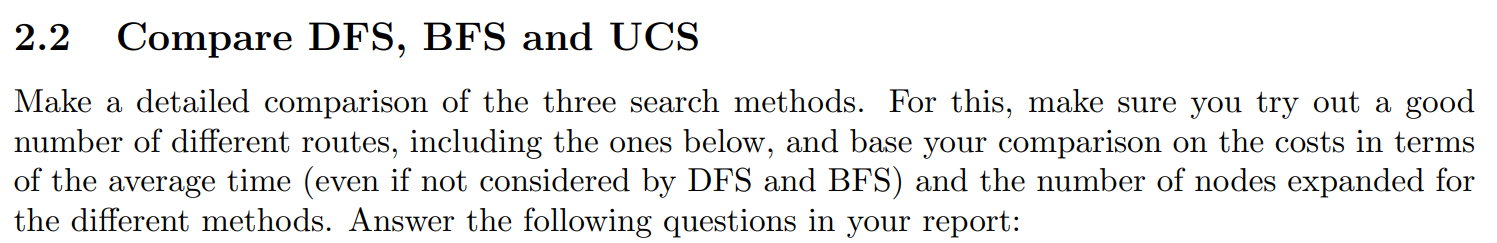

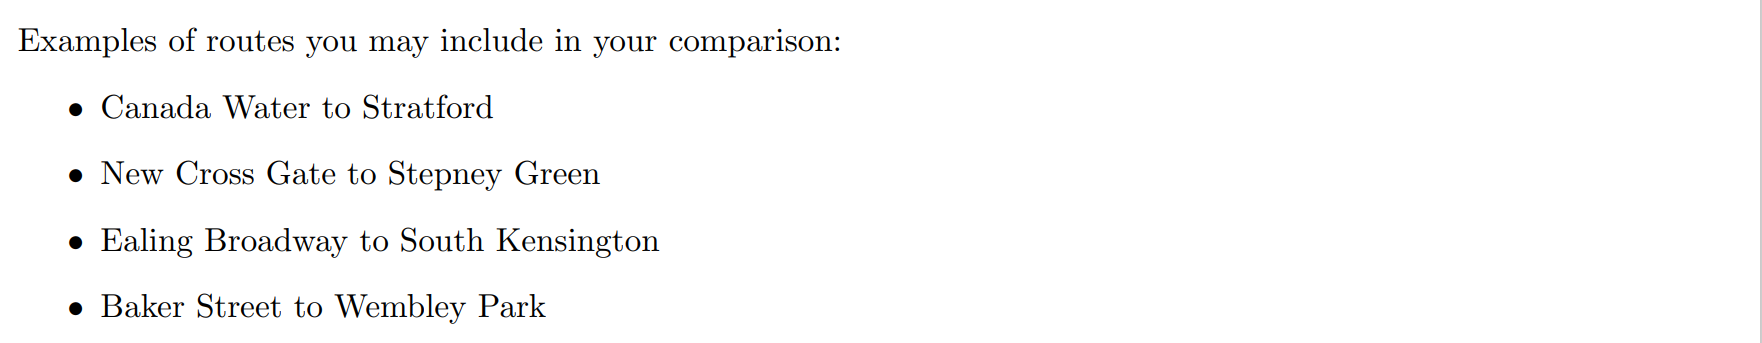

In [16]:
routes = [("Canada Water","Stratford"),("New Cross Gate","Stepney Green"),
          ("Ealing Broadway","South Kensington"),("Baker Street","Wembley Park")]

for start, end in routes:
    print("Route {} to {}".format(start, end))
    
    dfs_result = dfs(start, end)
    bfs_result = bfs(start, end)
    ucs_result = ucs(start, end)


    print("DFS Result:", dfs_result)
    print("BFS Result:", bfs_result)
    print("UCS Result:", ucs_result)
    print("\n\n\n")

Route Canada Water to Stratford
DFS Result: (['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 15, 5, 0.0)
BFS Result: (['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 15, 40, 0.0)
UCS Result: (['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford'], 14, 46, 0.0)




Route New Cross Gate to Stepney Green
DFS Result: (['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford', 'Mile End', 'Stepney Green'], 27, 32, 0.0)
BFS Result: (['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'], 14, 26, 0.0)
UCS Result: (['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'], 14, 18, 0.0)




Route Ealing Broadway to South Kensington
DFS Result: (['Ealing B

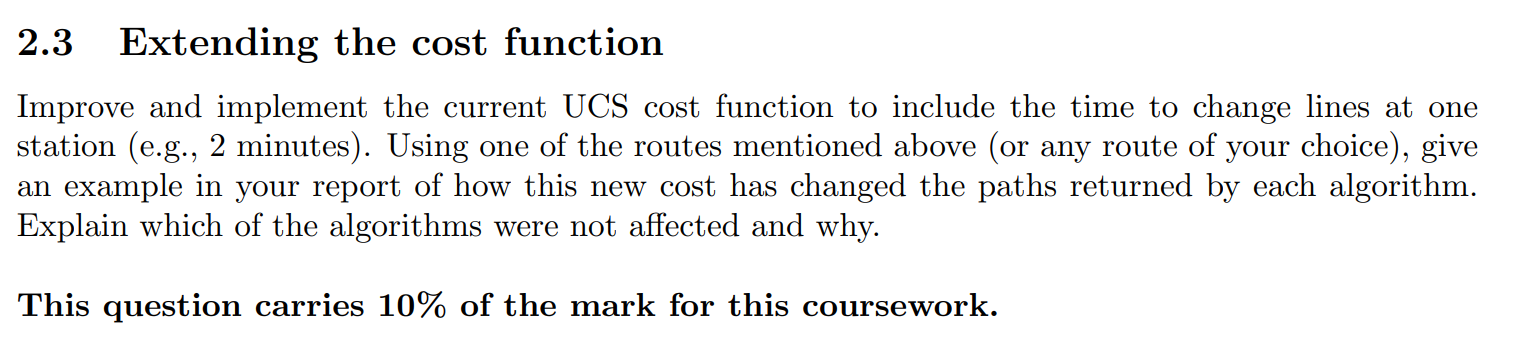

In [17]:
def extended_ucs(start_station, goal_station):
    start_time = time.time()
    start_state = State(start_station, None, [start_station], 0)
    priority_queue = [(0, start_state)]
    visited = set()
    expanded_nodes = 0

    while priority_queue:
        priority, current_state = priority_queue.pop(0)
        
        if current_state.current_station == goal_station:
            end_time = time.time()
            return current_state.path, current_state.cost , expanded_nodes, ((end_time - start_time)/len(current_state.path))
        
        expanded_nodes += 1
            
        for neighbour in current_state.get_neighbours():
            
            if neighbour.current_station not in visited:
                
                visited.add(neighbour.current_station)
                total_cost = current_state.cost + neighbour.cost
                
                if current_state != start_state and current_state.line != neighbour.line:
                    print("line change cost from {} to {}".format(current_state.line, neighbour.line))
                    total_cost += 120
                    
                priority_queue.extend([(total_cost, neighbour)])
                priority_queue.sort(key=lambda x: x[0])  # Sort the priority queue based on cost
                

In [18]:
start_station = 'Canada Water'
goal_station = 'Stratford'

extended_ucs_result = extended_ucs(start_station, goal_station)

print("Extended UCS Result:", extended_ucs_result) 

dfs_result = dfs(start_station, goal_station)
bfs_result = bfs(start_station, goal_station)
ucs_result = ucs(start_station, goal_station)


print("DFS Result:", dfs_result)
print("BFS Result:", bfs_result)
print("UCS Result:", ucs_result) 

line change cost from Jubilee to Northern
line change cost from Jubilee to Northern
line change cost from East London to District
line change cost from East London to District
line change cost from Jubilee to Bakerloo
line change cost from Jubilee to Bakerloo
line change cost from Jubilee to Northern
line change cost from Jubilee to Circle
line change cost from Jubilee to District
line change cost from Jubilee to District
line change cost from Jubilee to Piccadilly
line change cost from Jubilee to Piccadilly
line change cost from Jubilee to Victoria
line change cost from Jubilee to Victoria
Extended UCS Result: (['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 15, 20, 0.00016605854034423828)
DFS Result: (['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 15, 5, 0.0)
BFS Result: (['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 15, 40, 0.0)
UCS Result: (['

In [19]:
start_station = 'Waterloo'
goal_station = 'Chancery Lane'

extended_ucs_result = extended_ucs(start_station, goal_station)

print("Extended UCS Result:", extended_ucs_result) 

dfs_result = dfs(start_station, goal_station)
bfs_result = bfs(start_station, goal_station)
ucs_result = ucs(start_station, goal_station)


print("DFS Result:", dfs_result)
print("BFS Result:", bfs_result)
print("UCS Result:", ucs_result) 

line change cost from Bakerloo to Circle
line change cost from Jubilee to Circle
line change cost from Waterloo & City to Central
line change cost from Waterloo & City to Central
line change cost from Waterloo & City to Circle
line change cost from Waterloo & City to Circle
line change cost from Waterloo & City to Northern
line change cost from Jubilee to Northern
line change cost from Bakerloo to Northern
line change cost from Jubilee to Piccadilly
line change cost from Jubilee to Victoria
line change cost from Jubilee to Victoria
line change cost from Jubilee to Central
line change cost from Northern to Victoria
line change cost from Northern to Victoria
line change cost from Jubilee to East London
line change cost from Jubilee to East London
line change cost from Jubilee to Bakerloo
line change cost from Jubilee to Bakerloo
line change cost from Jubilee to Circle
line change cost from Jubilee to Circle
line change cost from Jubilee to Metropolitan
line change cost from Jubilee to Di

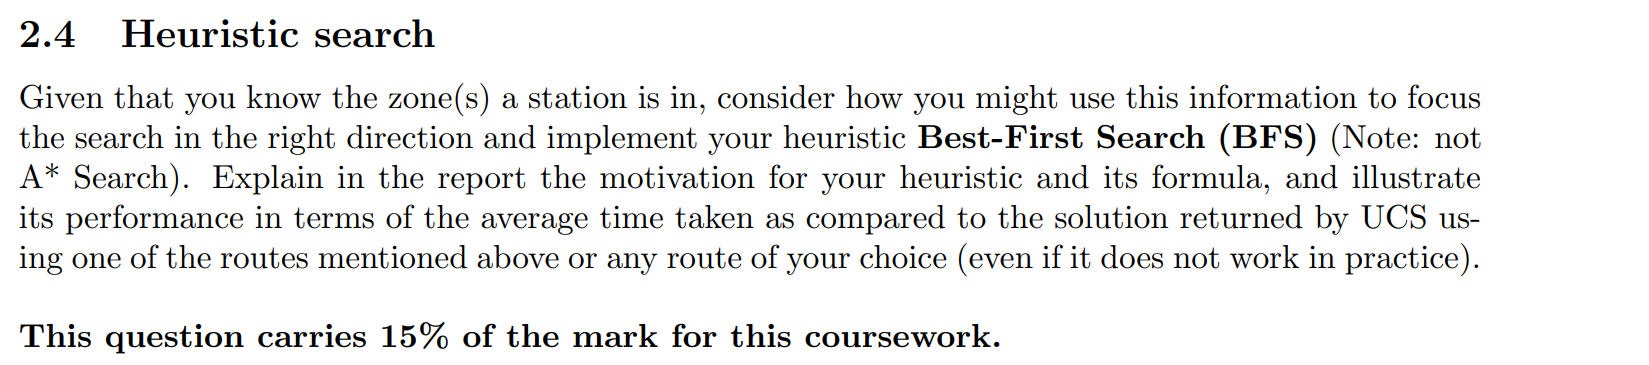

In [25]:
# def calculate_heuristic(station, target):
#     # Calculate the heuristic value for a station based on the minimum zone change to the target zone
#     station_zones = station.zone
#     target_zones = target.zone
    
#     differences = []
#     print(station_zones, target_zones)
#     for z_1 in station_zones:
#         for z_2 in target_zones:
#             differences.append(abs(int(z_2) - int(z_1)))
            
            
            
    
#     return max(differences)

def calculate_heuristic(station, target):
    
    set_1 = {int(char) for char in station.zone}
    set_2 = {int(char) for char in target.zone}
    print(set_1, set_2)
    
    station_zones = sum(set_1)
    target_zones = sum(set_2)
    
            
            
            
    
    return abs(station_zones - target_zones)

def bfs_with_heuristic(start_station, goal_station):
    start_time = time.time()
    start_state = State(start_station, None, [start_station], 0)
    queue = [(0, start_state)]
    visited = set()
    expanded_nodes = 0

    while queue:
        _, current_state = queue.pop(0)
        

        if current_state.current_station == goal_station:
            end_time = time.time()
            return current_state.path, current_state.cost, expanded_nodes, ((end_time - start_time)/len(current_state.path))
        
        expanded_nodes += 1
        
        for neighbour in current_state.get_neighbours():
            
            if neighbour.current_station not in visited:
                
                visited.add(neighbour.current_station)
                heuristic = calculate_heuristic(current_state, neighbour)
                print(heuristic)
                queue.extend([(heuristic, neighbour)])
                queue.sort(key=lambda x: x[0])
       
            

    # If no path is found
    return None


start_station = 'Canada Water'
goal_station = 'Stratford'

bfs_with_heuristic_result = bfs_with_heuristic(start_station, goal_station)

print("bfs_with_heuristic Result:", bfs_with_heuristic_result) 

{2} {2}
0
{2} {2}
0
{2} {1, 2}
1
{2} {2}
0
{2} {2}
0
{2} {2}
0
{2} {2}
0
{2} {2}
0
{2} {2, 3}
3
{2} {2}
0
{2} {1, 2}
1
{1, 2} {1}
2
{1, 2} {1}
2
{1, 2} {2}
1
{1, 2} {2}
1
{2} {2}
0
{2} {1, 2}
1
{2} {2, 3}
3
{2} {2}
0
{2} {2, 3}
3
{1, 2} {1}
2
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1, 2}
2
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1, 2}
2
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1, 2}
2
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1, 2}
2
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1}
0
{1} {1, 2}
2
{1} {1}
0
{1} {1, 2}
2
{1} {1, 2}
2
{1} {1, 2}
2
{1, 2} {2}
1
{2} {2}
0
{2} {2}
0
{2} {2}
0
{2} {2}
0
{2} {2, 3}
3
{1, 2} {1}
2
{1, 2} {2}
1
{1, 2} {2}
1
{2} {2}
0
{2} {2}
0
{2} {2, 3}
3
{1, 2} {1}
2
{1, 2} {1}
2
{1, 2} {1}
2
{1, 2} {2}
1
{1, 2} {1, 2}
0
{1, 2} {2}
1
{1, 2} {2}
1
{

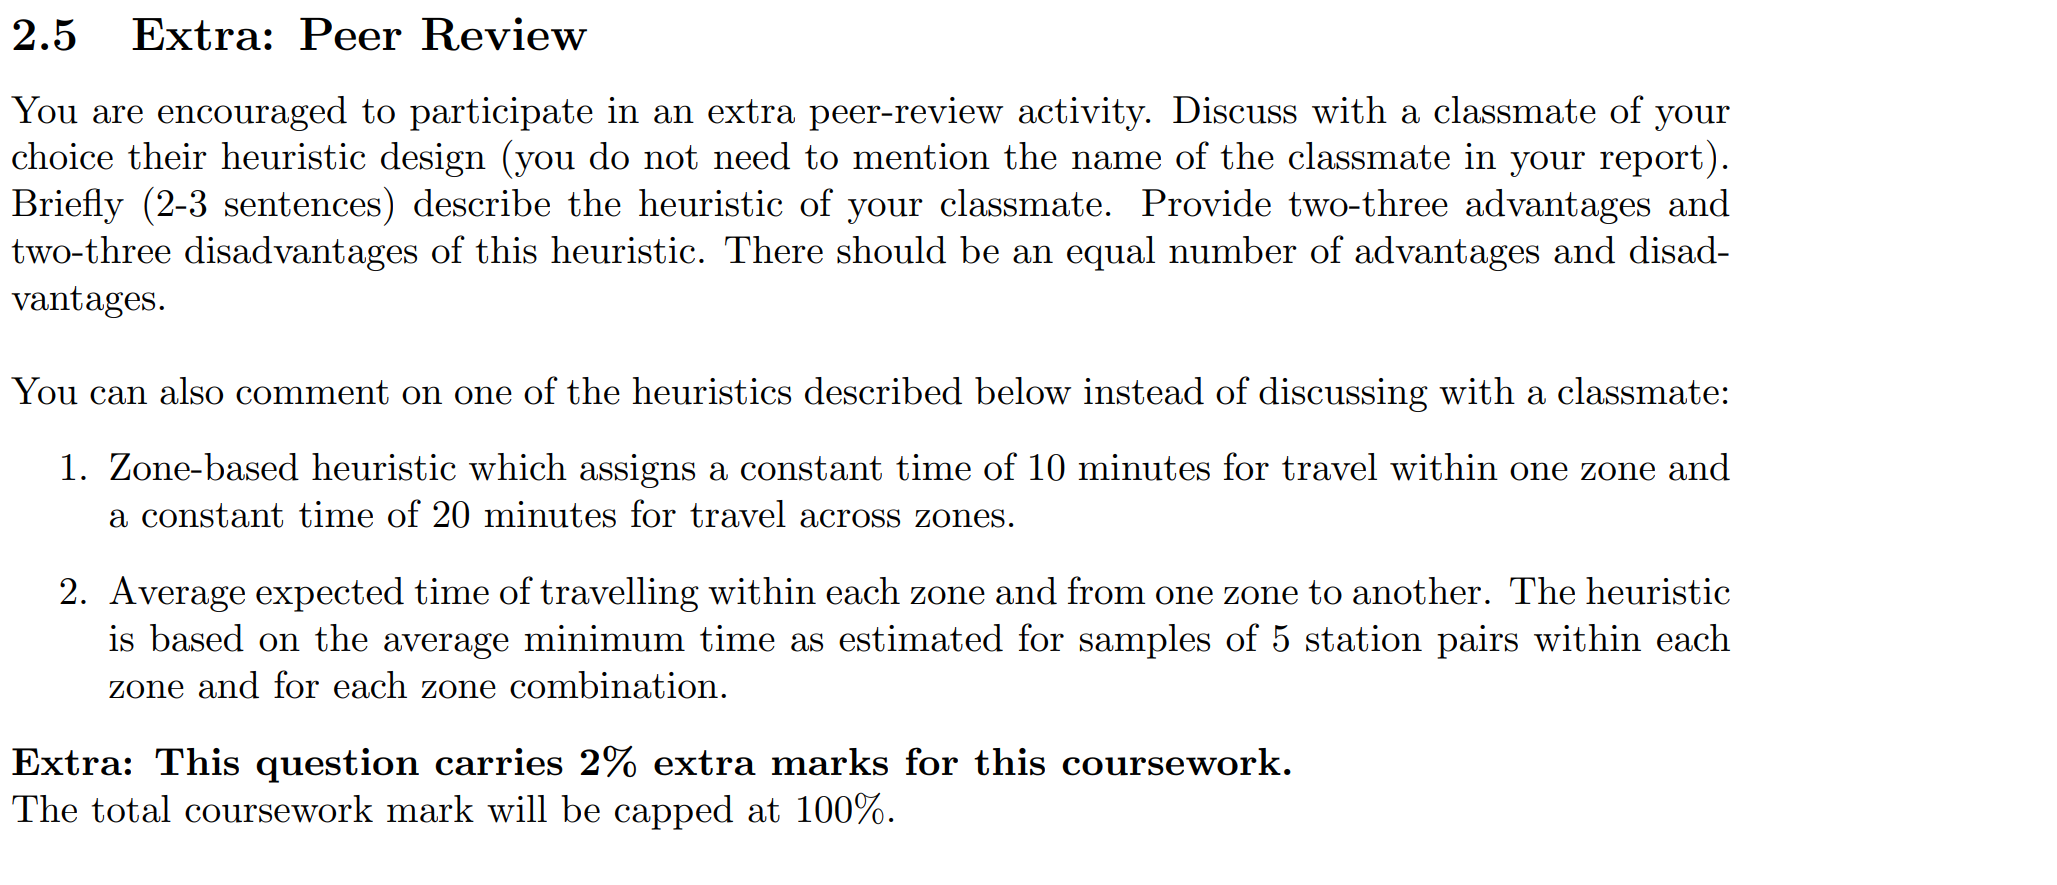